<IPython.core.display.Javascript object>


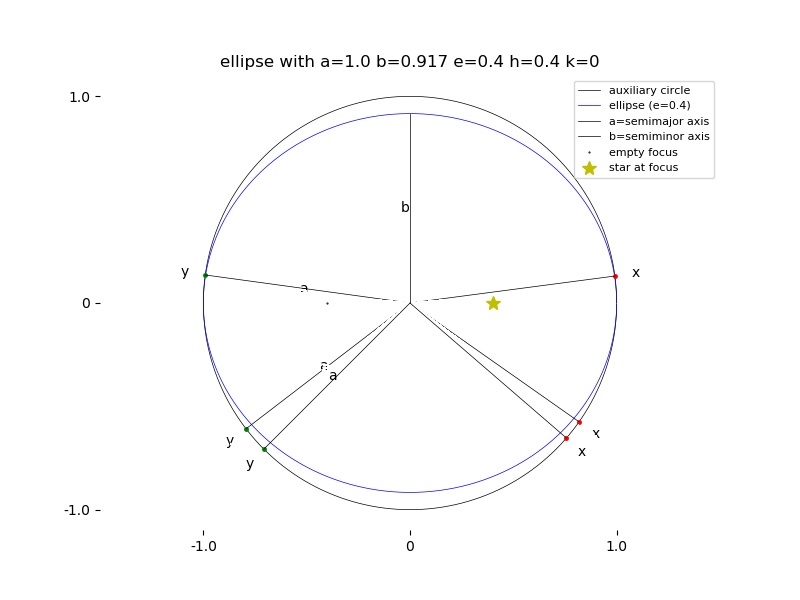

In [7]:
""" Ellipse Animation 6a
Calculation and animation of eccentric and true anomalies from mean anomaly
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# from matplotlib.animation import FFMpegWriter
from math import floor, factorial
%matplotlib notebook
# set up figure size and DPI for screen demo
# plt.rcParams['figure.figsize'] = (7, 7)
# plt.rcParams['figure.dpi'] = 100

TWOPI = 2*np.pi # numpy doesn't have tau (2π)

# fig = plt.figure(figsize=(5, 10))
fig = plt.figure(figsize=(8, 6), dpi=100)
# ax = plt.subplot(1,1,1,frameon=False,xticks=[],yticks=[],xlim=(-2.0,2.0),ylim=(-2.0,2.0))
# ax = plt.subplot(1,1,1,frameon=False,xticks=[],yticks=[],xlim=(-2.0,2.0),ylim=(-2.0,2.0))
xyticklabels=[-2.0,-1.0,0,1.0,2.0]
ax = plt.subplot(1,1,1,frameon=False,xticks=xyticklabels,yticks=xyticklabels,xlim=(-1.5,1.5),ylim=(-1.1,1.1))
# ax = plt.subplot(1,1,1,frameon=False,xticks=xyticklabels,yticks=xyticklabels)
# fig = plt.figure()
# ax = plt.subplot(1,1,1,projection='polar',frameon=False) # subplot(nrows, ncols, index, **kwargs)
# ax.set_rgrids([])
# ax.set_rticks([0.25, 0.5, 0.75, 1.0])
# ax.set_yticklabels([' ', 0.5, ' ', 1.0])
# ax.set_yticklabels([])
ax.set_yticklabels(xyticklabels)
# ax.set_thetagrids([])
# ax.set_xticklabels([])
ax.set_xticklabels(xyticklabels)

# fig, ax = plt.subplots(projection='polar')

# h&k are offsets from the origin for later use when setting a star at a focus
h = k = 0.0 # for now, the center of the ellipse is the origin
a = 1.0    # a is the semimajor axis
# b = 0.99    # b is the semiminor axis (assuming a>b)

# e is eccentricity of the ellipse. e = |cf|/a, where |cf| is the distance from the center to a focus (=h, assuming no tilt) and a is the semimajor axis
# given a & b we can calculate e using e = sqrt(1-b²/a²)
# if b<a:
#     e = (1-b**2/a**2)**0.5
# elif a<b:
#     e = (1-a**2/b**2)**0.5
# else: # a==b
#     e = 0.0

e = 0.4

# Finding minoraxis, b given majoraxis, a and eccentricity, e (see markdown cell above)
b = a*(1-e**2)**0.5

# given a & e, you can find the focal distance c using e = c/a or c = ea
c = e*a

# given a & e and having calculated b, we can find horizontal offset, h, and vertical, k
if b<a:
    k = 0
    h = (a**2-b**2)**0.5
elif a<b:
    h = 0
    k = (b**2-a**2)**0.5
else: # a==b
    h = k = 0

datapoints = 1200
datastepsize = TWOPI/datapoints
# theta until now has been the angle from the center of the ellipse. now it's the angle from the star at the focus
theta = np.arange(0.0, TWOPI, datastepsize)
#theta = M + 2*e*sin(M) + (5/4)*e**2*sin(2*M) + e**3*((13/12)*sin(3*M)-(1/4)*sin(M)) # not sure why this doesn't work but ok, i'll step through M
#theta = np.zeros(datapoints, dtype=float)
# for i in M:
# #     theta[i] = M[i] + 2*e*sin(M[i]) + (5/4)*e**2*sin(2*M[i]) + e**3*((13/12)*sin(3*M[i])-(1/4)*sin(M[i]))
#     print(f'step {i}: M[i]={M[i]} θ[i]={theta[i]}')

# def E(M, n):
#     E = M
#     for k in range(n):
# #         E = M + e*np.sin(E)
#         E = E + (M + e*np.sin(E) - E)*(1+e*np.cos(E))/(1-e**2*(np.cos(e))**2)
#     return E

# with np.nditer(theta, op_flags=['readwrite']) as it:
#     for m in it:
#         m[...] = E(m, 1000)
#        m[...] = m + m + (2*e-(1/4)*e**3)*np.sin(m)+((5/4)*e**2)*np.sin(2*m)+((13/12)*e**3)*np.sin(3*m)
#         m[...] = m + 2*e*np.sin(m) + (5/4)*e**2*np.sin(2*m) + e**3*((13/12)*np.sin(3*m)-(1/4)*np.sin(m))
#         m[...] = TWOPI*(1+2*e*np.cos(m)+(5/2)*e**2*np.cos(2*m)+e**3*((13/4)*np.cos(3*m)-(1/4)*np.cos(m)))

# M = np.arange(0.0, TWOPI, datastepsize) # M is Newton's Mean Anomoly, values from 0 to 2π in increments of datastepsize

# cartesian:
xcircle = np.cos(theta)
ycircle = np.sin(theta)
xellipse = a*np.cos(theta)    # ellipse x values from -1 to 1
yellipse = b*np.sin(theta)    # ellipse y values from -1 to 1
# xellipse = h + a*np.cos(theta)    # ellipse x values from -1 to 1
# yellipse = k + b*np.sin(theta)    # ellipse y values from -1 to 1
# l = plt.plot(x, y,         # x,y ellipse plot
# #              'b. ',        # made of blue dots--a visual check if the data points are evenly spaced (they shouldn't be for orbits)
#              'y-',         # a blue line
#              linewidth=3,
#              label='auxiliary circle (e=0)',             
#             )              #
# with plt.xkcd(): #if un-commented, remember to indent
ax.set_aspect('equal')
cir = plt.plot(xcircle, ycircle, 'k-', linewidth=0.5, label='auxiliary circle')
ell = plt.plot(xellipse, yellipse, 'b-', linewidth=0.5, label='ellipse (e={:.3})'.format(e))

ax.set_title('ellipse with a={:.3} b={:.3} e={:.3} h={} k={}'.format(a,b,e,h,k),fontsize=12)
# ax = plt.axis([-2,2,-2,2]) # plt.axis([xmin, xmax, ymin, ymax])
                           # equivalent to ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# redDot, = plt.plot([xellipse[10]], [yellipse[10]], 'r.', markersize=5, label='planet')
xDot, = plt.plot([xcircle[0]], [ycircle[0]], 'r.', markersize=5)
yDot, = plt.plot([xcircle[0]], [ycircle[0]], 'g.', markersize=5)
# pDot, = plt.plot([xcircle[0]], [ycircle[0]], 'b.', markersize=5)
xLine, = plt.plot((0,xcircle[0]), (0,ycircle[0]), 'k-', linewidth=0.5) # moves with xDot showing eccentric anomaly
yLine, = plt.plot((0,xcircle[0]), (0,ycircle[0]), 'k-', linewidth=0.5, label='a=semimajor axis') # moves with yDot showing mean anomaly
bLine, = plt.plot((0,0), (0,b*np.sin(np.pi/2)), 'k-', linewidth=0.5, label='b=semiminor axis') # static (not animated)

# plt.legend(loc='best', fontsize=8)
# polar:
# r = np.full(floor(TWOPI/datastepsize), 1.0) # to draw a circle; fill an nparray of the same size as theta with all 1.0's
# r = theta # to draw a spiral

# r = a*(1-e**2)/(1+e*np.cos(theta))

# plt.show()

foc0 = plt.plot(-h, -k, 'k. ', ms=1, label='empty focus') # plot the "empty" focus first
foc1 = plt.plot(h, k, 'y* ', ms=10, label='star at focus') # plot the location of the star 2nd (so it appears above the "empty" focus if they overlap)
# plt.plot(theta, r, 'b. ')   # plot the ellipse as blue dots to show spacing between points

plt.legend(loc='upper right', fontsize=8)
# plt.plot(np.pi, 2*c, 'k. ', ms=1) # plot the "empty" focus first
# plt.plot(0, 0, 'y* ', ms=10)       # plot the location of the star 2nd (so it appears above the "empty" focus if they overlap)
# plt.plot(theta, r, 'b. ')   # plot the ellipse as blue dots to show spacing between points
# ax = plt.axis([-2,2,-2,2]) # plt.axis([xmin, xmax, ymin, ymax])
#                            # equivalent to ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# redDot, = plt.plot([theta[0]], r[0], 'ro') # plot the planet's first location
# plt.show()
"""
Note that the value at x[-1] yields the last value in the numpy ndarray x.

It's the same value as x[floor(1000*TWOPI)], so when we want to reference various
values of x and y based on the iterator i with values from 0 to 2π the index of the
array x or y is the floor of 1000*i. It's times 1000 because we initially used a step
size of 1/1000 or 0.001. In the general case, it would be x[floor(i/datastepsize)].
"""

# xanimation = xcircle[0]
# yanimation = ycircle[0]
xy = (xcircle[0], ycircle[0])

xDotAnnotation = ax.annotate('x',
                          xy=xy,  xycoords='data',
                          xytext=xy, textcoords='data',
                          horizontalalignment='center', verticalalignment='center',
                          )

yDotAnnotation = ax.annotate('y',
#                           xy=(xanimation, yanimation),  xycoords='data',
#                           xytext=(xanimation, yanimation), textcoords='data',
                          xy=xy,  xycoords='data',
                          xytext=xy, textcoords='data',
#             arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='center',
                            )
# xAnnotation.set_animated(True)
yLineAnnotation = ax.annotate('a',
                          xy=xy,  xycoords='data',
#                           xytext=(xanimation/2, yanimation/2), textcoords='data',
                          xytext=(xy[0]/2,xy[1]/2), textcoords='data',
#                           arrowprops=dict(facecolor='black', shrink=0.05),
                          horizontalalignment='right', verticalalignment='center',
                         )

bLineAnnotation = ax.annotate('b',
                          xy=(0, 0),  xycoords='data',
                          xytext=(0, b*np.sin(np.pi/2)/2), textcoords='data',
#                           arrowprops=dict(facecolor='black', shrink=0.05),
                          horizontalalignment='right', verticalalignment='center',
                         )


# analytical solution from Tokis, A Solution of Kepler’s Equation, https://www.scirp.org/pdf/IJAA_2014123013365071.pdf
# E = M + (e**2-(1-(1-e)*(1+e*M**2/(1-e)**3)**0.5)**2)**0.5

# given mean anomaly, return the eccentric anomaly, from http://pepijndevos.nl/2015/02/05/simulating-the-solar-system.html
def solve_kepler(eccentricity, mean_anomaly):
    # for the approximate formulae in the present context, tol = 10e-6 degrees is sufficient
    tolerance = 10e-6
    # E0 = M + e sin M
    eccentric_anomaly = mean_anomaly + (eccentricity * np.sin(mean_anomaly))
    # and iterate the following equations with n = 0,1,2,... until |delta E| <= tol
    while True:
        ax.set_title('M={:.3} E={:.3} ∆E={:.3} e={:.3}'.format(mean_anomaly,eccentric_anomaly,delta_eccentric_anomaly,e),fontsize=12)
        # delta M = M - (En - e sin En)
        delta_mean_anomaly = mean_anomaly - (eccentric_anomaly - (eccentricity * math.sin(eccentric_anomaly)))
        # delta E = delta M / (1 - e cos En)
        delta_eccentric_anomaly = delta_mean_anomaly / (1 - (eccentricity * math.cos(eccentric_anomaly)))
        # En+1 = En + delta E
        eccentric_anomaly += delta_eccentric_anomaly
#         print('eccentric anomaly: {} ∆: {}'.format(eccentric_anomaly, delta_eccentric_anomaly))

        if abs(delta_eccentric_anomaly) <= tolerance:
            return eccentric_anomaly

# Create the init function that returns the objects that will change during the animation process
def init(): # only needed if blit=True
    return yDot, yDotAnnotation, yLine, yLineAnnotation, xDot, xDotAnnotation, xLine
#     return cir, ell, foc0, foc1, xDot, xAnnotation

def animate(radians):
#     redDot.set_data(np.cos(i), np.sin(i))
#     redDot.set_data(x[floor(i/datastepsize)], y[floor(i/datastepsize)])
#     redDot.set_data(x[floor(i/0.001)], y[floor(i/0.001)])
#     redDot.set_data(x[floor(i*1000)], y[floor(i*1000)])
#     redDot.set_data(theta[floor(i/datastepsize)], r[floor(i/datastepsize)])

    M = radians
    E = np.sin(M)# + (e**2-(1-(1-e)*(1+e*M**2/(1-e)**3)**0.5)**2)**0.5 # eqs. 40 & 41 from Tokis, A Solution of Kepler’s Equation
#     E = solve_kepler(e, M)
    
    xx = xcircle[floor((E/datastepsize)%datapoints)] # x position for xdot
    yx = ycircle[floor((E/datastepsize)%datapoints)] # y position for xdot
    
    xy = xcircle[floor((M/datastepsize)%datapoints)] # x position for ydot
    yy = ycircle[floor((M/datastepsize)%datapoints)] # y position for ydot

    yDot.set_data(xy, yy)
    yDotAnnotation.set_position((xy*1.1, yy*1.1))
    yLine.set_data((0,xy), (0,yy))
    yLineAnnotation.set_position((xy/2, yy/2))
    xDot.set_data(xx, yx)
    xDotAnnotation.set_position((xx*1.1, yx*1.1))
    xLine.set_data((0,xx), (0,yx))
#     xAnnotation.set_position((xanimation+0.1*np.cos(radians), yanimation+0.1*np.sin(radians)))
#     xAnnotation.xytext = (xanimation, yanimation) # doesn't work
#     xAnnotation.xy = (xanimation, yanimation) # only needed for annotation arrowhead
#     plt.title('a={:^2.3f} b={:^2.3f} e={:^2.2f} radians: {:^2.1f}'.format(a, b, e, radians))
    return yDot, yDotAnnotation, yLine, yLineAnnotation, xDot, xDotAnnotation, xLine
#     return cir, ell, foc0, foc1, xDot, xAnnotation
# # create animation using the animate() function

# # disabling progress_callback lambda function during mybinder.org development on iPad :)

# # progress_callback = lambda i, n: print(f'Saving frame {i+1} of {n}')
animation = FuncAnimation(fig, animate, 
                          frames=np.arange(0.0, TWOPI, 0.01),
#                           frames=theta,
#                           frames=M,
                          interval=10, blit=False, repeat=True, init_func=init)

# # animation = FuncAnimation(plt.gcf(), #get current figure or gcf
# #                           update, #the function to update
# #                           frames=frames, #overrides the default frames behavior of counting up i in integers from 0
# #                           interval=interval,
# #                           #repeat = False, #option to stop animation after one iteration
# #                           repeat_delay = 2e3, #optional delay in ms; 1e3 = 1000 ms = 1 s
# #                           #progress_callback=progress_callback
# #                           )

# # disabling saving .mp4 during mybinder.org development on iPad :)

# # # from matplotlib.animation import FFMpegWriter
# # writer = FFMpegWriter(fps=15, metadata=dict(artist='Stephen Shadle'), bitrate=1800)
# # #ani.save("/home/pi/Documents/Thonny/dynamic_image.mp4", writer=writer) #explicit directory
# # animation.save("animate_ellipse.{:^2.2f}.mp4".format(e), writer=writer, progress_callback=progress_callback) #current directory